In [1]:
import pandas as pd

fname = '../../PNC2/pht003445.txt'

df = pd.read_table(fname, comment='#')

print(df)

       dbGaP_Subject_ID        SUBJID  INT_NUM INT_TYPE        Race Sex  \
0                791086  600001103037        1       MP          AA   M   
1                791086  600001103037        2       MI          AA   M   
2                791087  600001676724        1       AP          AA   F   
3                791088  600003245643        1      YPI          AA   M   
4                791090  600004963801        1       MP          EA   F   
...                 ...           ...      ...      ...         ...  ..   
14636            800198  609993878116        2       MI          EA   M   
14637            800199  609998081561        1       MP  EA,HI + OT   M   
14638            800199  609998081561        2       MI  EA,HI + OT   M   
14639            800200  609999144528        1       MP          EA   F   
14640            800200  609999144528        2       MI          EA   F   

       Med_birth_year Med_Rating  ADD011  ADD012  ...  SUB_OTC  SUB_PSY  \
0              1999.0   

/tmp/ipykernel_69922/1203871330.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname, comment='#')


In [2]:
# Get subjects from demographics file

import pickle

demofile = '../../ImageNomer/data/anton/cohorts/test/demographics.pkl'

with open(demofile, 'rb') as f:
    demo = pickle.load(f)
    
for key in ['age', 'sex', 'wrat']:
    print(len(list(demo[key].keys())))
    
sublst = list(demo['age'].keys())
sublst = [int(sub) for sub in sublst]
print(sublst[:2])

830
830
830
[605485715456, 605971292161]


In [6]:
# Race for subjects

import math

demo['pvrt_cr'] = dict()

for sub in sublst:
    r = df[(df['SUBJID'] == sub) & (df['INT_NUM'] == 1)]['PVRT_CR']
    r = r.values[0]
    if isinstance(r, float) and math.isnan(r):
        print(sub)
        r = 'Missing'
        continue
    demo['pvrt_cr'][str(sub)] = r
    
print(len(list(demo['race'].keys())))

604005673003
600730262874
609270820400
830


In [4]:
demo

{'age': {'605485715456': 148,
  '605971292161': 228,
  '609361965061': 250,
  '606024507405': 127,
  '609170741262': 209,
  '607245656080': 190,
  '602291275795': 161,
  '605832800275': 206,
  '603854632982': 153,
  '600994234394': 171,
  '604978657307': 146,
  '609485506588': 249,
  '604630931488': 181,
  '605189074977': 229,
  '609575311394': 156,
  '605792122916': 179,
  '607024945188': 105,
  '603155642406': 250,
  '606039672874': 214,
  '604005673003': 134,
  '606213296175': 199,
  '609383534643': 162,
  '603213455413': 187,
  '608480460853': 218,
  '605690210359': 177,
  '608481615925': 203,
  '605992095801': 198,
  '609635211319': 157,
  '601022070840': 236,
  '607377981504': 205,
  '600635899969': 144,
  '601927448642': 188,
  '606860716104': 192,
  '608382697547': 206,
  '608620585035': 194,
  '607242854479': 163,
  '607487055951': 154,
  '603822512211': 195,
  '608394170451': 132,
  '607717904472': 198,
  '602898753625': 179,
  '600641554524': 169,
  '603959672926': 115,
  '6

In [7]:
# Save new demographics info

with open(demofile, 'wb') as f:
    pickle.dump(demo, f)
    
print('Complete')

Complete


(2, 3)
3


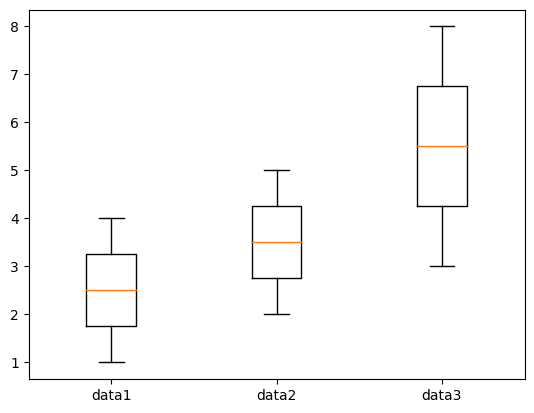

In [26]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[1,2,3],[4,5,8]])
labels = ['data1', 'data2', 'data3']
print(data.shape)
print(len(labels))

plt.boxplot(data, labels=labels)
plt.show()